# Exemplo de "Bag of Visual Words"

Vocês estão recebendo este código do professor e devem dar o crédito devido, para que não se caracterize a situação de tentar passar esforço dos outros como sendo seu (a.k.a. plágio). Divirtam-se!

In [64]:
!pip install opencv-contrib-python
import cv2
import os
import os.path
import numpy as np
import math

DATA_DIR = 'Assets/Data_Filtered_Resized'
CATEGORY_LIST = ['Bulbasaur','Arbok','Aerodactyl', 'Alakazam', 'Bellsprout','Arcanine', 'Beedrill']
NUM_IMAGES_TRAIN_PER_CATEGORY = 80
NUM_IMAGES_TEST_PER_CATEGORY = 22
NUM_CLUSTERS = 20

def get_images_from_category(category, num_train, num_test, data_dir):
    category_dir = os.path.join(DATA_DIR, category)
    num_total = num_train + num_test
    filenames_train = []
    filenames_test = []
    
    for k, filename in enumerate(os.listdir(category_dir)):
        if k < num_train:
            filenames_train.append(os.path.join(category_dir, filename))
        elif k < num_total:
            filenames_test.append(os.path.join(category_dir, filename))
        else:
            break
    return filenames_train, filenames_test

def get_images_from_category_list(category_list, num_train, num_test, data_dir):
    filenames_train_all = []
    target_train = []
    filenames_test_all = []
    target_test = []
    for category in category_list:
        filenames_train, filenames_test = get_images_from_category(category, num_train, num_test, data_dir)
        filenames_train_all.extend(filenames_train)
        target_train.extend([category] * NUM_IMAGES_TRAIN_PER_CATEGORY)
        filenames_test_all.extend(filenames_test)
        target_test.extend([category] * NUM_IMAGES_TEST_PER_CATEGORY)
    return filenames_train_all, filenames_test_all, target_train, target_test

def cria_vocabulario(imagens, num_clusters):
    km = cv2.BOWKMeansTrainer(num_clusters)
    akaze = cv2.KAZE_create()
    for p in imagens:
        img = cv2.imread(p, cv2.IMREAD_GRAYSCALE)
        mask = np.ones(img.shape)
        kp, desc = akaze.detectAndCompute(img, mask)
        km.add(desc)
    return km.cluster()

def representa(vocab, img):
    kaze = cv2.KAZE_create()
    kp = kaze.detect(img)
    bowdesc = cv2.BOWImgDescriptorExtractor(kaze, cv2.FlannBasedMatcher())
    bowdesc.setVocabulary(vocab)
    return bowdesc.compute(img, kp)

def transforma_imagens(imagens, vocab):
    X = []
    for p in imagens:
        img = cv2.imread(p, cv2.IMREAD_GRAYSCALE)
        X.append(representa(vocab, img).flatten())
    return np.array(X)

In [65]:
imagens_train, imagens_test, target_train, target_test = get_images_from_category_list(CATEGORY_LIST, 
                                                                                        NUM_IMAGES_TRAIN_PER_CATEGORY, 
                                                                                        NUM_IMAGES_TEST_PER_CATEGORY, 
                                                                                        DATA_DIR)
vocab = cria_vocabulario(imagens_train, NUM_CLUSTERS)
X_train = transforma_imagens(imagens_train, vocab)
X_test = transforma_imagens(imagens_test, vocab)
y_train = target_train
y_test = target_test

In [73]:
from sklearn.ensemble import RandomForestClassifier
# Set random seed
np.random.seed(0)

# Create a random forest Classifier. By convention, clf means 'Classifier'
clf = RandomForestClassifier(n_jobs=-1, random_state=0, n_estimators = 100)

# Train the Classifier to take the training features and learn how they relate
# to the training y (the species)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.6125

## Bibliografia:
- Modelo Bag of Visual Words produzido por Fábio Ayres.
- Dataset: [Pokémon Gen One](https://www.kaggle.com/thedagger/pokemon-generation-one/data) da plataforma Kaggle.com


In [74]:
# np.fromstring(palavra, dtype = int)

palavra = str(X_train.tolist())

with open ('image_text.txt', 'w') as image:
    conteudo = image.write(palavra)
    
with open('image_text.txt' , 'r') as image:
    content = image.read()


array([[0.43, 0.09, 0.28, 0.2 ]])

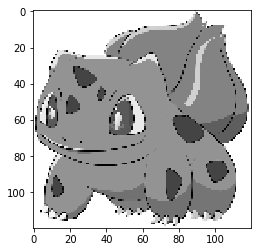

In [75]:
import matplotlib.pyplot as plt

img = cv2.imread("Assets/Testes/Testes/Bulbassauro.png", cv2.IMREAD_GRAYSCALE)
img_resized = cv2.resize(img, dsize=(90, 90), interpolation=cv2.INTER_CUBIC)
plt.imshow(img_resized, cmap='gray', vmin=0, vmax=255)
features_img = representa(vocab, img_resized)
clf.predict_proba(features_img)
#features_img

In [76]:
clf.classes_

array(['Bulbasaur', 'Mewtwo', 'Pikachu', 'Squirtle'], dtype='<U9')